# 図 2.9 の生成

In [ ]:
! pip install POT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ot
import scipy.optimize

In [2]:
# データ生成
np.random.seed(0)
a = np.random.randn(10, 2)
b = np.random.randn(10, 2)

In [3]:
C = np.sqrt(((a.reshape(-1, 1, 2) - b.reshape(1, -1, 2)) ** 2).sum(2)) # コスト行列

In [4]:
P = ot.emd(np.ones(10) / 10, np.ones(10) / 10, C) # 最適輸送行列の計算
P # （参考：系 2.20）

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. ],
       [0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. ],
       [0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. ],
       [0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. ]])

In [5]:
(C * P).sum() # 最適輸送コスト

1.059520913944732

In [6]:
# 問題 2.6 の係数の生成
c = np.concatenate([np.ones(10) / 10, np.ones(10) / 10])
A_ub = np.zeros((10 * 10, 20))
b_ub = np.zeros(10 * 10)
for i in range(10):
    for j in range(10):
        A_ub[i * 10 + j, i] = 1
        A_ub[i * 10 + j, 10 + j] = 1
        b_ub[i * 10 + j] = C[i, j]

In [7]:
res = scipy.optimize.linprog(-c, A_ub, b_ub) # 線形計画ソルバを用いて解く。`scipy.optimize.linprog` は最小化を行なうので目的関数に負号を付けて最大化を表現する。
res # fun: 最適値。これが最適輸送コストと一致 = 強双対定理

     con: array([], dtype=float64)
     fun: -1.0595209134421055
 message: 'Optimization terminated successfully.'
     nit: 8
   slack: array([ 1.35356266e+00,  6.89483081e-01,  8.57181592e-01,  7.41028278e-01,
        1.33095092e-01,  7.52362001e-01,  1.21830769e+00,  1.01709087e+00,
        5.76963921e-10,  7.43625223e-01,  9.12083631e-01,  2.23167519e+00,
        2.86021234e+00,  1.53725763e+00,  5.17083376e-10,  1.19084496e+00,
        2.28131684e+00,  1.37297272e+00,  1.15954392e-01,  1.37830767e+00,
        2.18194200e+00,  7.06812403e-01,  4.00310118e-10,  1.35193007e+00,
        1.94965639e+00,  1.76825274e+00,  1.02789016e+00,  1.82081293e+00,
        1.74839401e+00,  1.27526363e+00,  7.97088876e-01,  6.06119444e-03,
        9.63120348e-01,  3.79066744e-03,  9.35072830e-01,  2.72054840e-01,
        4.21250412e-01,  3.98700843e-01,  5.92489950e-01, -1.53108637e-11,
        2.46910982e-01,  1.49654507e+00,  2.70910286e+00,  2.97221247e-01,
        1.74390404e+00,  1.59331970e-0

In [8]:
# 色付け用の関数
def convert(xs, up, down):
    xs = (xs - xs.min()) / (xs.max() - xs.min())
    return [
        tuple([min(max((up[i] * x + down[i] * (1 - x)) / 255, 0), 1) for i in range(3)])
        for x in xs
    ]

[]

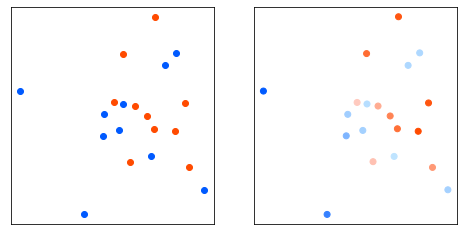

In [9]:
fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(1, 2, 1)
ax.scatter(a[:, 0], a[:, 1], c='#ff4b00')
ax.scatter(b[:, 0], b[:, 1], c='#005aff')
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(1, 2, 2)
ax.scatter(a[:, 0], a[:, 1], c=convert(res.x[:10], (255, 75, 0), (255, 202, 191)))
ax.scatter(b[:, 0], b[:, 1], c=convert(res.x[10:], (0, 90, 255), (191, 228, 255)))
ax.set_xticks([])
ax.set_yticks([])